In [84]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
import pandas as pd
import os
from modelling_pkg.config import *

In [86]:
DATADIR = "../../../" + DATADIR

In [87]:
SAVE_IMMEDIATELY_TO = f"{DATADIR}/rom_results"

In [88]:
results_folder = os.path.join(
    SAVE_IMMEDIATELY_TO, "Czech_Republic~2024-04~2024-07", "v07-test"
)
model_versions = ["14,28", "11,19", "10,43", "10,37", "08,26"]
clf_files = {
    model_version: os.path.join(results_folder, model_version, "clf.csv")
    for model_version in model_versions
}

In [89]:
dfs = {
    model_version: pd.read_csv(f_name) for model_version, f_name in clf_files.items()
}

,Unnamed: 0.1,Unnamed: 0,offer_id,created_date_shp,updated_date_shp,agreement_id_shp,organization_id,sales_id_shp,offer_type_shp,agreement_row_id_shp,...,offers_in_oppo,finality,final_outcome,final_discount_shp,revenue_bin,discount_oms,discount_delta,pred,pred_b,accepted
0,34306,34306,CZ_O_148599546575,2024-04-02 07:51:27,2024-04-02 08:37:27,CZ_O_148599546575,DHL CZ,MSUROVCO,Standard GPI Offer,1-MBV6J5S,...,1.0,final,Accepted,89.310346,mid-low,76.000000,13.310346,0.992784,1,1
1,34307,34307,CZ_O_148599546575,2024-04-02 07:51:27,2024-04-02 08:37:27,CZ_O_148599546575,DHL CZ,MSUROVCO,Standard GPI Offer,1-MBV6J5S,...,1.0,final,Accepted,89.720631,mid-low,76.000000,13.720631,0.997951,1,1
2,34308,34308,CZ_O_148599547022,2024-04-02 08:15:16,2024-04-05 15:20:20,CZ_O_148599547022,DHL CZ,MSUROVCO,Standard GPI Offer,1-MBXPX3Y,...,1.0,final,Accepted,75.000000,low,64.162485,10.837515,0.976527,1,1
3,34312,34312,CZ_O_148601734398,2024-04-02 07:05:35,2024-04-02 10:49:26,CZ_O_148601734398,DHL CZ,ZJAROSOV,Standard GPI Offer,1-MBYTD2T,...,1.0,final,Accepted,55.000000,medium,60.000000,-5.000000,0.049965,0,1
4,34313,34313,CZ_O_148601734398,2024-04-02 07:05:35,2024-04-02 10:49:26,CZ_O_148601734398,DHL CZ,ZJAROSOV,Standard GPI Offer,1-MBYTD2T,...,1.0,final,Accepted,55.000000,medium,60.000000,-5.000000,0.180735,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,38081,38081,CZ_O_153323018090,2024-06-28 13:38:16,2024-07-01 17:08:13,CZ_O_153323018090,DHL CZ,MSUROVCO,Standard GPI Offer,1-OIUG0GJ,...,1.0,final,Accepted,50.000000,medium,59.000000,-9.000000,0.882461,1,1
2063,38085,38085,CZ_O_153324883760,2024-06-28 14:27:04,2024-07-01 08:12:57,CZ_O_153324883760,DHL CZ,MSUROVCO,Standard GPI Offer,1-OITJVDK,...,1.0,final,Accepted,85.869773,mid-low,65.000000,20.869773,0.989817,1,1
2064,38086,38086,CZ_O_153324883760,2024-06-28 14:27:04,2024-07-01 08:12:57,CZ_O_153324883760,DHL CZ,MSUROVCO,Standard GPI Offer,1-OITJVDK,...,1.0,final,Accepted,85.785747,mid-low,65.000000,20.785747,0.996857,1,1
2065,38087,38087,CZ_O_153324883760,2024-06-28 14:27:04,2024-07-01 08:12:57,CZ_O_153324883760,DHL CZ,MSUROVCO,Standard GPI Offer,1-OITJVDK,...,1.0,final,Accepted,79.760277,mid-low,65.000000,14.760277,0.991538,1,1


In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score


def plot_multiple_roc_curves(pred_dicts, y_test, title="ROC Curves Comparison"):
    plt.figure(figsize=(10, 8))

    # Plot random classifier line
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random")

    # Plot ROC curve for each model
    for name, predictions in pred_dicts.items():
        y_pred_proba = predictions
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

    # Customize plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)

    return plt

In [26]:
(dfs["14,28"]["accepted"] == dfs["11,19"]["accepted"]).all()

True

In [40]:
import numpy as np

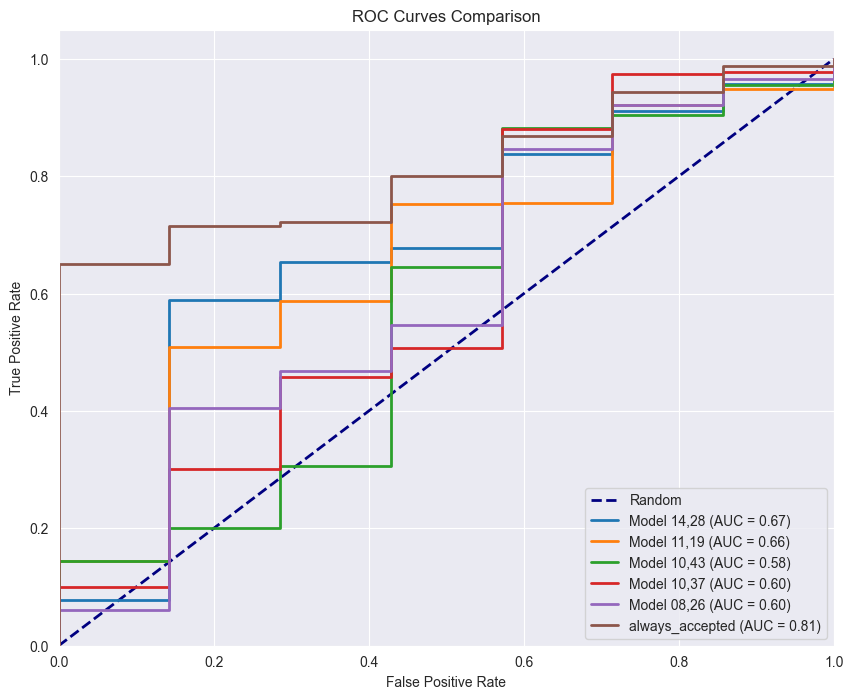

In [62]:
models = {f"Model {model_version}": df["pred"] for model_version, df in dfs.items()}
models["always_accepted"] = np.random.uniform(
    0.988, 0.999, len(dfs["14,28"]["accepted"])
)
plot_multiple_roc_curves(models, dfs["14,28"]["accepted"])
plt.show()

In [31]:
def plot_multiple_pr_curves(
    pred_dicts, y_test, title="Precision-Recall Curves Comparison"
):
    plt.figure(figsize=(10, 8))

    # Add baseline (random classifier)
    no_skill = len(y_test[y_test == 1]) / len(y_test)
    plt.plot(
        [0, 1],
        [no_skill, no_skill],
        color="navy",
        lw=2,
        linestyle="--",
        label=f"Random (AP = {no_skill:.2f})",
    )

    # Plot PR curve for each model
    for name, predictions in pred_dicts.items():
        y_pred_proba = predictions
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        avg_precision = average_precision_score(y_test, y_pred_proba)

        plt.plot(recall, precision, lw=2, label=f"{name} (AP = {avg_precision:.2f})")

    # Customize plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)
    plt.legend(loc="best")
    plt.grid(True)

    return plt


def plot_precision_recall_curve(y_true, y_pred_proba, title="Precision-Recall Curve"):
    """
    Plot Precision-Recall curve for binary classification.

    Parameters:
    -----------
    y_true : array-like
        True binary labels
    y_pred_proba : array-like
        Predicted probabilities for the positive class
    title : str
        Title for the plot
    """
    # Calculate Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)

    # Calculate average precision
    avg_precision = average_precision_score(y_true, y_pred_proba)

    # Create plot
    plt.figure(figsize=(8, 6))
    plt.plot(
        recall,
        precision,
        color="darkorange",
        lw=2,
        label=f"PR curve (AP = {avg_precision:.2f})",
    )

    # Add baseline (random classifier)
    no_skill = len(y_true[y_true == 1]) / len(y_true)
    plt.plot(
        [0, 1],
        [no_skill, no_skill],
        color="navy",
        lw=2,
        linestyle="--",
        label=f"Random (AP = {no_skill:.2f})",
    )

    # Customize plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)
    plt.legend(loc="best")
    plt.grid(True)

    return plt

In [36]:
dfs["14,28"]["accepted"].value_counts()

1    2060
0       7
Name: accepted, dtype: int64

In [83]:
dfs["14,28"].shape

(13589, 141)

In [82]:
dfs["14,28"][["gsfa_customer_id", "product_cluster_shp"]].drop_duplicates().shape

(12238, 2)

In [37]:
dfs["14,28"]["pred"].value_counts()

0.990016    2
0.985383    2
0.996734    2
0.923546    2
0.963459    2
           ..
0.991082    1
0.988624    1
0.996025    1
0.989667    1
0.994145    1
Name: pred, Length: 2013, dtype: int64

<module 'matplotlib.pyplot' from '/Users/Roman_Arkhipov/Library/CloudStorage/OneDrive-McKinsey&Company/(INT)-dhl_exp_pricing_3_implementation - Documents/02 QB Implementation/03 Workstreams/02 WTP 3.0/WTP code/01_offline-experiments/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

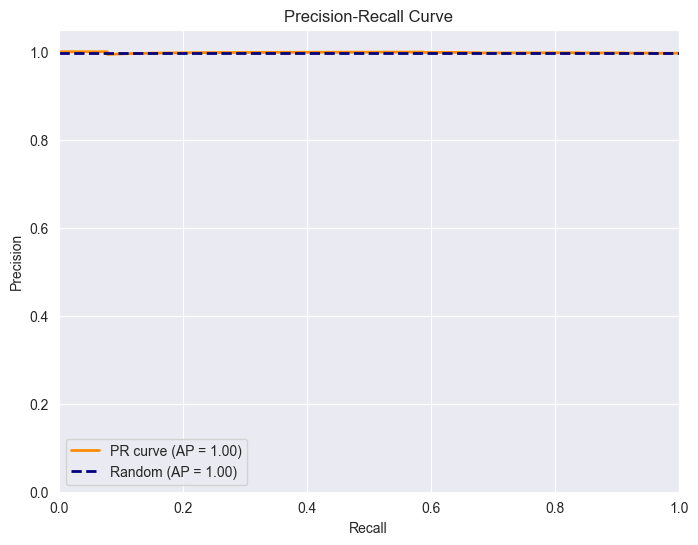

In [33]:
plot_precision_recall_curve(
    dfs["14,28"]["accepted"], dfs["14,28"]["pred"], title="Precision-Recall Curve"
)

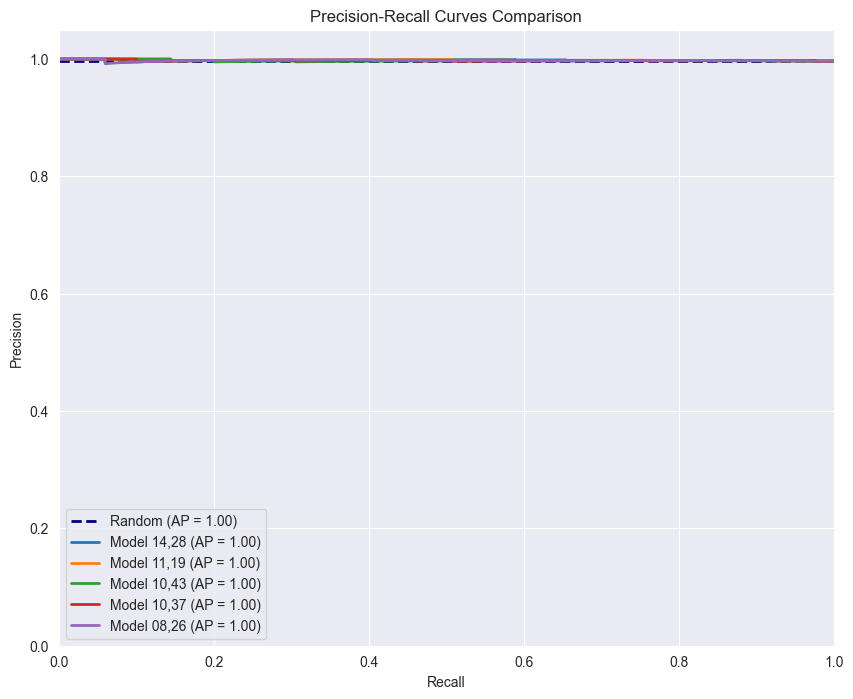

In [30]:
plot_multiple_pr_curves(models, dfs["14,28"]["accepted"])
plt.show()

In [72]:
results_folder = os.path.join(SAVE_IMMEDIATELY_TO, "Italy~2024-04~2024-07", "v07-test")
model_versions = ["14,28", "11,19", "10,43", "10,37", "08,26"]
clf_files = {
    model_version: os.path.join(results_folder, model_version, "clf.csv")
    for model_version in model_versions
}

In [75]:
dfs = {
    model_version: pd.read_csv(f_name) for model_version, f_name in clf_files.items()
}

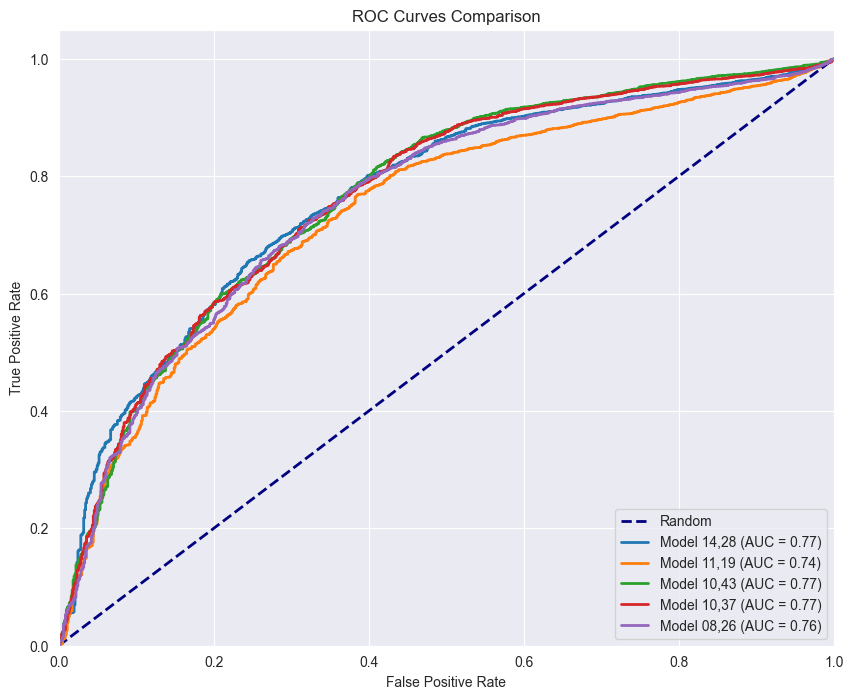

In [77]:
models = {f"Model {model_version}": df["pred"] for model_version, df in dfs.items()}
plot_multiple_roc_curves(models, dfs["14,28"]["accepted"])
plt.show()

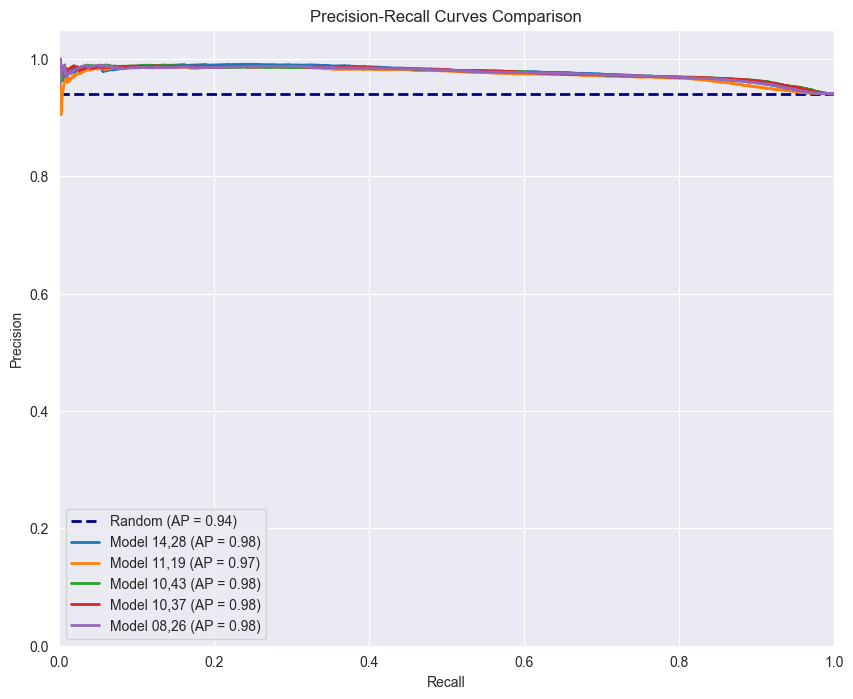

In [78]:
plot_multiple_pr_curves(models, dfs["14,28"]["accepted"])
plt.show()

In [114]:
df = pd.read_csv("../../../Data/training-data-POC-countries/Italy.csv")

/var/folders/4h/5gqvp_397s5g0hy6t6llg5bc0000gp/T/ipykernel_25097/1100188786.py:1: DtypeWarning: Columns (27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,45,46,47,48,50,51,52,53,55,56,57,63,65,66,122,124,126,131) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../../Data/training-data-POC-countries/Italy.csv')


In [115]:
df["industry"].value_counts(dropna=False, normalize=True)

NaN         0.655069
IND:FASH    0.070756
IND:CSMR    0.069664
IND:ENGM    0.048438
IND:RETL    0.043667
IND:TECH    0.031902
IND:PROF    0.021116
IND:AUTO    0.017021
IND:OTHR    0.016382
IND:LSHE    0.011811
IND:CHEM    0.009739
IND:FINS    0.002080
IND:PSEC    0.001561
IND:ENGY    0.000795
Name: industry, dtype: float64

In [116]:
df["final_outcome"].value_counts(normalize=True)

Accepted       0.413916
In Progress    0.361618
Rejected       0.224467
Name: final_outcome, dtype: float64

In [119]:
df[df["final_outcome"] == "Accepted"]["discount_shp"].mean()

67.29119810165989

In [120]:
df = pd.read_csv("../../../Data/training-data-POC-countries/Czech_Republic.csv")

/var/folders/4h/5gqvp_397s5g0hy6t6llg5bc0000gp/T/ipykernel_25097/631150922.py:1: DtypeWarning: Columns (27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,45,46,47,48,50,51,52,53,55,56,57,63,65,66,123,125,127,132) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../../Data/training-data-POC-countries/Czech_Republic.csv')


In [121]:
df["final_outcome"].value_counts(normalize=True)

Accepted       0.869883
In Progress    0.079480
Rejected       0.050637
Name: final_outcome, dtype: float64

In [122]:
df[df["final_outcome"] == "Accepted"]["discount_shp"].mean()

57.0618598774859

In [111]:
df["industry"].value_counts(dropna=False, normalize=True)

IND:RETL    0.223461
IND:ENGM    0.166965
IND:CSMR    0.131103
IND:TECH    0.123740
IND:PROF    0.122739
IND:AUTO    0.063526
IND:FASH    0.057402
IND:LSHE    0.054471
IND:CHEM    0.022351
IND:PSEC    0.016275
IND:FINS    0.007530
NaN         0.005743
IND:ENGY    0.004456
IND:OTHR    0.000238
Name: industry, dtype: float64

In [123]:
df = pd.read_csv("../../../Data/training-data-POC-countries/Thailand.csv")

/var/folders/4h/5gqvp_397s5g0hy6t6llg5bc0000gp/T/ipykernel_25097/3984762681.py:1: DtypeWarning: Columns (27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,45,46,47,48,50,51,52,53,55,56,57,63,65,66,116,118,120,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../../Data/training-data-POC-countries/Thailand.csv')


In [124]:
df["final_outcome"].value_counts(normalize=True)

Accepted       0.885177
Rejected       0.079502
In Progress    0.035321
Name: final_outcome, dtype: float64

In [125]:
df[df["final_outcome"] == "Accepted"]["discount_shp"].mean()

30.142902831653142

In [104]:
df["industry"].value_counts(dropna=False, normalize=True)

NaN         0.421171
IND:OTHR    0.105477
IND:CSMR    0.086455
IND:ENGM    0.082620
IND:AUTO    0.077937
IND:FASH    0.060008
IND:RETL    0.048078
IND:TECH    0.036304
IND:PROF    0.023994
IND:PSEC    0.019467
IND:LSHE    0.015989
IND:CHEM    0.013268
IND:ENGY    0.006400
IND:FINS    0.002832
Name: industry, dtype: float64